In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA ,KernelPCA
from scipy.stats import pearsonr
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.impute import SimpleImputer
from sklearn.manifold import TSNE

# Sélection des datasets

In [2]:
dataset=pd.read_csv("olist_order_payments_dataset.csv")
pd.set_option("display.max_columns",None)
dataset

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [3]:
B=pd.read_csv("olist_geolocation_dataset.csv")
B

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [4]:
C=pd.read_csv("olist_customers_dataset.csv")
C

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [5]:
D=pd.read_csv("olist_order_items_dataset.csv")
D

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [6]:
E=pd.read_csv("olist_order_reviews_dataset.csv")
E

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [7]:
F=pd.read_csv("olist_orders_dataset.csv")
F

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [8]:
H=pd.read_csv("olist_products_dataset.csv")
H

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [9]:
G=pd.read_csv("olist_sellers_dataset.csv")
G

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [10]:
L=pd.read_csv("product_category_name_translation.csv")
L

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


# Sélection du dataset final

In [11]:
merge_dataset=pd.merge(dataset,D,on='order_id',how='inner')

In [12]:
merge_dataset=pd.merge(merge_dataset,H,on='product_id',how='inner')

In [13]:
merge_dataset=pd.merge(merge_dataset,F,on='order_id',how='inner')

In [14]:
merge_dataset=pd.merge(merge_dataset,C,on='customer_id',how='inner')

In [15]:
merge_dataset=pd.merge(merge_dataset,L,on='product_category_name',how='inner')

In [16]:
merge_dataset.describe()

,payment_sequential,payment_installments,payment_value,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix
count,115878.000000,115878.000000,115878.000000,115878.000000,115878.000000,115878.000000,115878.000000,115878.000000,115878.000000,115877.000000,115877.000000,115877.000000,115877.000000,115878.000000
mean,1.092830,2.945572,173.016646,1.196319,120.924716,20.075868,48.766116,786.956428,2.207727,2117.594190,30.311554,16.656886,23.110445,35053.626763
std,0.725313,2.779978,268.110998,0.699564,184.217144,15.870900,10.035366,653.071898,1.719519,3785.744297,16.225837,13.480721,11.758209,29813.671064
min,1.000000,0.000000,0.000000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1003.000000
25%,1.000000,1.000000,61.010000,1.000000,39.900000,13.080000,42.000000,347.000000,1.000000,300.000000,18.000000,8.000000,15.000000,11320.000000
50%,1.000000,2.000000,108.200000,1.000000,74.900000,16.320000,52.000000,601.000000,1.000000,700.000000,25.000000,13.000000,20.000000,24317.500000
75%,1.000000,4.000000,189.720000,1.000000,134.900000,21.220000,57.000000,985.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,58547.500000
max,29.000000,24.000000,13664.080000,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99980.000000


In [17]:
merge_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115878 entries, 0 to 115877
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       115878 non-null  object 
 1   payment_sequential             115878 non-null  int64  
 2   payment_type                   115878 non-null  object 
 3   payment_installments           115878 non-null  int64  
 4   payment_value                  115878 non-null  float64
 5   order_item_id                  115878 non-null  int64  
 6   product_id                     115878 non-null  object 
 7   seller_id                      115878 non-null  object 
 8   shipping_limit_date            115878 non-null  object 
 9   price                          115878 non-null  float64
 10  freight_value                  115878 non-null  float64
 11  product_category_name          115878 non-null  object 
 12  product_name_lenght           

In [18]:
final_dataset=merge_dataset.drop(columns=['order_id','shipping_limit_date','order_purchase_timestamp','order_delivered_customer_date','order_estimated_delivery_date','seller_id','product_id','order_approved_at','order_delivered_carrier_date','order_delivered_carrier_date','customer_id','order_item_id','product_category_name','customer_zip_code_prefix','order_item_id'])

In [19]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115878 entries, 0 to 115877
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   payment_sequential             115878 non-null  int64  
 1   payment_type                   115878 non-null  object 
 2   payment_installments           115878 non-null  int64  
 3   payment_value                  115878 non-null  float64
 4   price                          115878 non-null  float64
 5   freight_value                  115878 non-null  float64
 6   product_name_lenght            115878 non-null  float64
 7   product_description_lenght     115878 non-null  float64
 8   product_photos_qty             115878 non-null  float64
 9   product_weight_g               115877 non-null  float64
 10  product_length_cm              115877 non-null  float64
 11  product_height_cm              115877 non-null  float64
 12  product_width_cm              

In [20]:
final_dataset

,payment_sequential,payment_type,payment_installments,payment_value,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_status,customer_unique_id,customer_city,customer_state,product_category_name_english
0,1,credit_card,8,99.33,79.80,19.53,57.0,921.0,8.0,800.0,17.0,27.0,17.0,delivered,708ab75d2a007f0564aedd11139c7708,teofilo otoni,MG,home_construction
1,1,credit_card,4,93.72,79.80,13.92,57.0,921.0,8.0,800.0,17.0,27.0,17.0,delivered,550a1a0e8ad53e4147e6c761b5699c2b,barretos,SP,home_construction
2,1,credit_card,4,218.48,113.85,30.41,51.0,921.0,7.0,1050.0,16.0,20.0,16.0,delivered,82b7ba90f0f9db6117ef25071323d270,salvador,BA,home_construction
3,1,boleto,1,172.81,37.95,42.14,32.0,638.0,4.0,500.0,17.0,27.0,17.0,delivered,43103ed378c67d1df45d3028173f68f7,paraibano,MA,home_construction
4,1,credit_card,3,345.19,208.00,42.94,44.0,443.0,2.0,13900.0,40.0,40.0,40.0,delivered,8635f91d481482da68f901e2f6de5c9a,sao jose,SC,home_construction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115873,1,credit_card,7,74.94,65.00,9.94,47.0,117.0,2.0,550.0,35.0,15.0,25.0,delivered,5426571d21e82bb33eaab30e48e6f290,sao paulo,SP,cds_dvds_musicals
115874,1,credit_card,1,61.11,45.00,16.11,47.0,117.0,2.0,550.0,35.0,15.0,25.0,delivered,16329fb4019e7cc00bb10ce853e34013,belford roxo,RJ,cds_dvds_musicals
115875,1,boleto,1,122.22,45.00,16.11,47.0,117.0,2.0,550.0,35.0,15.0,25.0,delivered,92f65b75e3c4a45c14f410b4aac4db69,mato leitao,RS,cds_dvds_musicals
115876,1,boleto,1,122.22,45.00,16.11,47.0,117.0,2.0,550.0,35.0,15.0,25.0,delivered,92f65b75e3c4a45c14f410b4aac4db69,mato leitao,RS,cds_dvds_musicals


In [53]:
final_dataset['product_category_name_english'].value_counts()

bed_bath_table               11823
health_beauty                 9972
sports_leisure                8945
furniture_decor               8744
computers_accessories         8082
                             ...  
arts_and_craftmanship           24
la_cuisine                      16
cds_dvds_musicals               14
fashion_childrens_clothes        8
security_and_services            2
Name: product_category_name_english, Length: 71, dtype: int64

In [21]:
final_dataset.describe()

,payment_sequential,payment_installments,payment_value,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,115878.000000,115878.000000,115878.000000,115878.000000,115878.000000,115878.000000,115878.000000,115878.000000,115877.000000,115877.000000,115877.000000,115877.000000
mean,1.092830,2.945572,173.016646,120.924716,20.075868,48.766116,786.956428,2.207727,2117.594190,30.311554,16.656886,23.110445
std,0.725313,2.779978,268.110998,184.217144,15.870900,10.035366,653.071898,1.719519,3785.744297,16.225837,13.480721,11.758209
min,1.000000,0.000000,0.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,1.000000,1.000000,61.010000,39.900000,13.080000,42.000000,347.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,1.000000,2.000000,108.200000,74.900000,16.320000,52.000000,601.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,1.000000,4.000000,189.720000,134.900000,21.220000,57.000000,985.000000,3.000000,1800.000000,38.000000,20.000000,30.000000
max,29.000000,24.000000,13664.080000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


# Nettoyage des données

In [22]:
imputer=SimpleImputer(missing_values=np.nan,strategy='median')
imputer=imputer.fit(final_dataset.iloc[:,9:13])
final_dataset.iloc[:,9:13]=imputer.transform(final_dataset.iloc[:,9:13])
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115878 entries, 0 to 115877
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   payment_sequential             115878 non-null  int64  
 1   payment_type                   115878 non-null  object 
 2   payment_installments           115878 non-null  int64  
 3   payment_value                  115878 non-null  float64
 4   price                          115878 non-null  float64
 5   freight_value                  115878 non-null  float64
 6   product_name_lenght            115878 non-null  float64
 7   product_description_lenght     115878 non-null  float64
 8   product_photos_qty             115878 non-null  float64
 9   product_weight_g               115878 non-null  float64
 10  product_length_cm              115878 non-null  float64
 11  product_height_cm              115878 non-null  float64
 12  product_width_cm              

In [23]:
final_dataset.isna().mean()

payment_sequential               0.0
payment_type                     0.0
payment_installments             0.0
payment_value                    0.0
price                            0.0
freight_value                    0.0
product_name_lenght              0.0
product_description_lenght       0.0
product_photos_qty               0.0
product_weight_g                 0.0
product_length_cm                0.0
product_height_cm                0.0
product_width_cm                 0.0
order_status                     0.0
customer_unique_id               0.0
customer_city                    0.0
customer_state                   0.0
product_category_name_english    0.0
dtype: float64

In [24]:
final_dataset.describe()

,payment_sequential,payment_installments,payment_value,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,115878.000000,115878.000000,115878.000000,115878.000000,115878.000000,115878.000000,115878.000000,115878.000000,115878.000000,115878.000000,115878.000000,115878.000000
mean,1.092830,2.945572,173.016646,120.924716,20.075868,48.766116,786.956428,2.207727,2117.581957,30.311509,16.656855,23.110418
std,0.725313,2.779978,268.110998,184.217144,15.870900,10.035366,653.071898,1.719519,3785.730252,16.225775,13.480667,11.758161
min,1.000000,0.000000,0.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,1.000000,1.000000,61.010000,39.900000,13.080000,42.000000,347.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,1.000000,2.000000,108.200000,74.900000,16.320000,52.000000,601.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,1.000000,4.000000,189.720000,134.900000,21.220000,57.000000,985.000000,3.000000,1800.000000,38.000000,20.000000,30.000000
max,29.000000,24.000000,13664.080000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [25]:
final_dataset.to_csv('E_commerce.csv',index= False)

In [26]:
reg=final_dataset['product_category_name_english']
reg.value_counts(normalize=True)


bed_bath_table               0.102030
health_beauty                0.086056
sports_leisure               0.077193
furniture_decor              0.075459
computers_accessories        0.069746
                               ...   
arts_and_craftmanship        0.000207
la_cuisine                   0.000138
cds_dvds_musicals            0.000121
fashion_childrens_clothes    0.000069
security_and_services        0.000017
Name: product_category_name_english, Length: 71, dtype: float64

In [27]:
x = final_dataset.iloc[:, [2,3,4,5,6,7,8,9,10,11,12,0]].values

In [28]:
x.shape

(115878, 12)

# ACP Linéaire

In [29]:
scaler=StandardScaler()
scaler.fit(x)
x_scaled=scaler.transform(x)

In [30]:
n_components = 8
pca = PCA(n_components=n_components)
pca.fit(x_scaled)

PCA(n_components=8)

In [31]:
pca.explained_variance_ratio_
scree = (pca.explained_variance_ratio_*100).round(2)
scree_cum = scree.cumsum().round()
scree_cum

array([27., 40., 50., 59., 67., 74., 81., 87.])

In [32]:
res_pca=pca.fit_transform(x_scaled)
res_pca

array([[-1.74987880e-03,  1.13144593e+00, -2.25482478e+00, ...,
         1.34360597e+00,  1.77605419e+00, -2.17340545e+00],
       [-4.56306658e-01,  7.99889228e-01, -2.42988939e+00, ...,
         1.44803905e+00,  1.69890671e+00, -1.06210835e+00],
       [-2.35554591e-02,  1.12219736e+00, -1.63731716e+00, ...,
         1.53221278e+00,  1.43440450e+00, -7.07333598e-01],
       ...,
       [-6.58486817e-01, -8.37809946e-01,  3.34730894e-01, ...,
         2.78226031e-01,  2.54460510e-01,  7.11695821e-01],
       [-6.58486817e-01, -8.37809946e-01,  3.34730894e-01, ...,
         2.78226031e-01,  2.54460510e-01,  7.11695821e-01],
       [ 6.99010889e-01, -4.26341775e-01,  6.15310958e-01, ...,
         1.20945651e-01,  6.66845069e-01, -5.34987336e-01]])

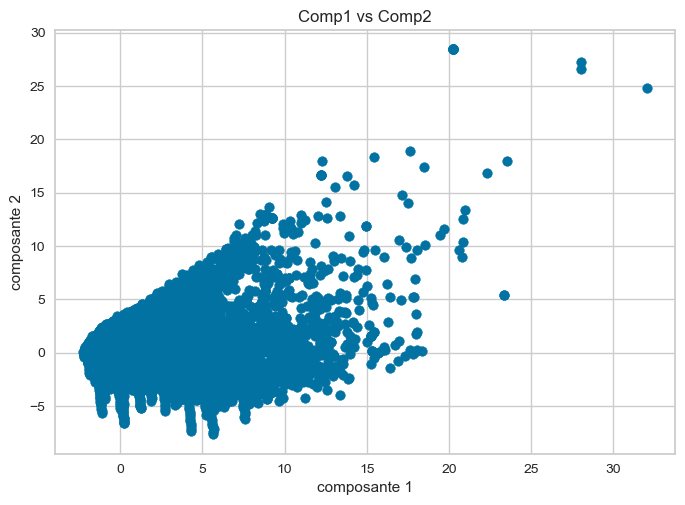

In [33]:
plt.scatter(res_pca[:, 0], res_pca[:, 1])
plt.xlabel("composante 1")
plt.ylabel("composante 2")
plt.title("Comp1 vs Comp2")
plt.show()

In [34]:
pearsonr(res_pca[:, 0], res_pca[:, 1])[0]

-6.938893903907228e-18

In [35]:
final_dataset['x_respca']=res_pca[:, 0]
final_dataset['y_respca']=res_pca[:, 1]

In [36]:
final_dataset.head()

,payment_sequential,payment_type,payment_installments,payment_value,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_status,customer_unique_id,customer_city,customer_state,product_category_name_english,x_respca,y_respca
0,1,credit_card,8,99.33,79.80,19.53,57.0,921.0,8.0,800.0,17.0,27.0,17.0,delivered,708ab75d2a007f0564aedd11139c7708,teofilo otoni,MG,home_construction,-0.001750,1.131446
1,1,credit_card,4,93.72,79.80,13.92,57.0,921.0,8.0,800.0,17.0,27.0,17.0,delivered,550a1a0e8ad53e4147e6c761b5699c2b,barretos,SP,home_construction,-0.456307,0.799889
2,1,credit_card,4,218.48,113.85,30.41,51.0,921.0,7.0,1050.0,16.0,20.0,16.0,delivered,82b7ba90f0f9db6117ef25071323d270,salvador,BA,home_construction,-0.023555,1.122197
3,1,boleto,1,172.81,37.95,42.14,32.0,638.0,4.0,500.0,17.0,27.0,17.0,delivered,43103ed378c67d1df45d3028173f68f7,paraibano,MA,home_construction,-0.147795,0.121049
4,1,credit_card,3,345.19,208.00,42.94,44.0,443.0,2.0,13900.0,40.0,40.0,40.0,delivered,8635f91d481482da68f901e2f6de5c9a,sao jose,SC,home_construction,3.568016,-1.462298


# Optimisation des paramètres

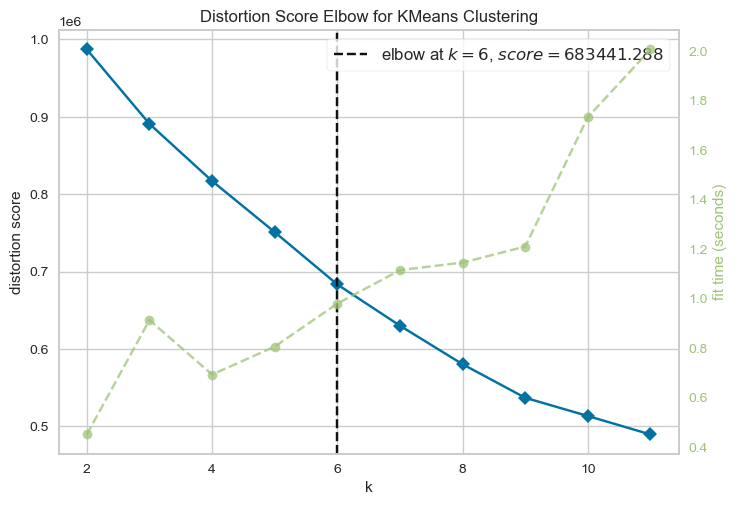

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [39]:
kmeans=KMeans()
visio=KElbowVisualizer(kmeans, k=(2,12))
visio.fit(res_pca)
visio.show()

# Clustering

In [40]:
cluster_model=KMeans(n_clusters=6)
cluster_model.fit(res_pca)
clusters=cluster_model.predict(res_pca)

In [47]:
clusters


array([4, 4, 4, ..., 1, 1, 0], dtype=int32)

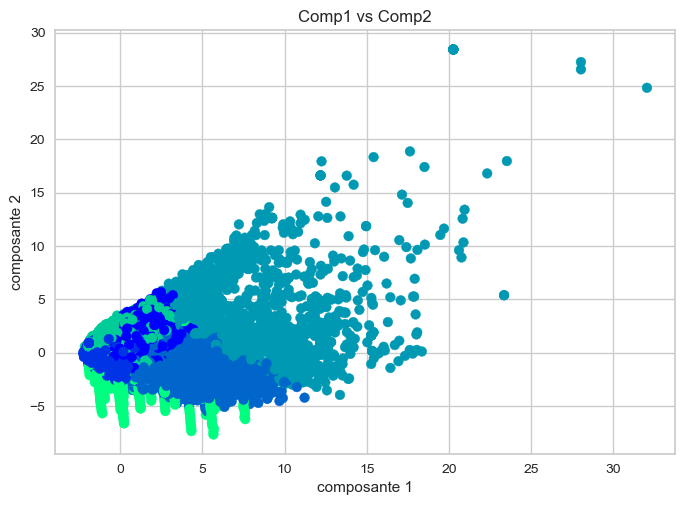

In [43]:
plt.scatter(res_pca[:, 0], res_pca[:, 1],c = clusters, cmap='winter')
plt.xlabel("composante 1")
plt.ylabel("composante 2")
plt.title("Comp1 vs Comp2")
plt.show()

In [44]:
final_dataset['Cluster_respca']=clusters

In [45]:
final_dataset.head()

,payment_sequential,payment_type,payment_installments,payment_value,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_status,customer_unique_id,customer_city,customer_state,product_category_name_english,x_respca,y_respca,Cluster_respca
0,1,credit_card,8,99.33,79.80,19.53,57.0,921.0,8.0,800.0,17.0,27.0,17.0,delivered,708ab75d2a007f0564aedd11139c7708,teofilo otoni,MG,home_construction,-0.001750,1.131446,4
1,1,credit_card,4,93.72,79.80,13.92,57.0,921.0,8.0,800.0,17.0,27.0,17.0,delivered,550a1a0e8ad53e4147e6c761b5699c2b,barretos,SP,home_construction,-0.456307,0.799889,4
2,1,credit_card,4,218.48,113.85,30.41,51.0,921.0,7.0,1050.0,16.0,20.0,16.0,delivered,82b7ba90f0f9db6117ef25071323d270,salvador,BA,home_construction,-0.023555,1.122197,4
3,1,boleto,1,172.81,37.95,42.14,32.0,638.0,4.0,500.0,17.0,27.0,17.0,delivered,43103ed378c67d1df45d3028173f68f7,paraibano,MA,home_construction,-0.147795,0.121049,1
4,1,credit_card,3,345.19,208.00,42.94,44.0,443.0,2.0,13900.0,40.0,40.0,40.0,delivered,8635f91d481482da68f901e2f6de5c9a,sao jose,SC,home_construction,3.568016,-1.462298,2


In [48]:
final_dataset['Cluster_respca'].unique()

array([4, 1, 2, 0, 5, 3], dtype=int32)

In [49]:
final_dataset['Cluster_respca'].value_counts()

1    62076
4    21463
0    17014
2    13005
3     1812
5      508
Name: Cluster_respca, dtype: int64

In [55]:
final_dataset.groupby(['Cluster_respca','product_category_name_english','customer_city']).mean()

/var/folders/64/xbnl04752rd562f9w8d832xh0000gn/T/ipykernel_2131/209308096.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  final_dataset.groupby(['Cluster_respca','product_category_name_english','customer_city']).mean()


payment_sequential  \
Cluster_respca product_category_name_english customer_city                              
0              agro_industry_and_commerce    amparo                               1.0   
                                             aparecida de goiania                 1.0   
                                             ararangua                            1.0   
                                             ariquemes                            1.0   
                                             atibaia                              1.0   
...                                                                               ...   
5              toys                          sao paulo                            6.5   
                                             volta redonda                        6.0   
               watches_gifts                 caucaia                              7.0   
                                             goiania                              7.0   
                                             quatro barras                        6.0   

                                                                   payment_installments  \
Cluster_respca product_category_name_english customer_city                                
0              agro_industry_and_commerce    amparo                                 8.0   
                                             aparecida de goiania                  10.0   
                                             ararangua                              9.0   
                                             ariquemes                              8.0   
                                             atibaia                                5.0   
...                                                                                 ...   
5              toys                          sao paulo                              1.0   
                                             volta redonda                          1.0   
               watches_gifts                 caucaia                                1.0   
                                             goiania                                1.0   
                                             quatro barras                          1.0   

                                                                   payment_value  \
Cluster_respca product_category_name_english customer_city                         
0              agro_industry_and_commerce    amparo                   439.720000   
                                             aparecida de goiania     585.320000   
                                             ararangua                445.870000   
                                             ariquemes                224.600000   
                                             atibaia                  455.860000   
...                                                                          ...   
5              toys                          sao paulo                 11.765000   
                                             volta redonda             12.440000   
               watches_gifts                 caucaia                    4.093333   
                                             goiania                  109.180000   
                                             quatro barras             19.610000   

                                                                   price  \
Cluster_respca product_category_name_english customer_city                 
0              agro_industry_and_commerce    amparo                412.0   
                                             aparecida de goiania  549.0   
                                             ararangua             412.0   
                                             ariquemes              22.0   
                                             atibaia               412.0   
...                                                                  ...   
5              toys     

In [62]:
subset=final_dataset.groupby(['Cluster_respca','product_category_name_english','customer_city']).mean().sample(frac=0.001)

/var/folders/64/xbnl04752rd562f9w8d832xh0000gn/T/ipykernel_2131/3087821620.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subset=final_dataset.groupby(['Cluster_respca','product_category_name_english','customer_city']).mean().sample(frac=0.001)


In [63]:
subset

,,,payment_sequential,payment_installments,payment_value,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,x_respca,y_respca
Cluster_respca,product_category_name_english,customer_city,,,,,,,,,,,,,,
2,housewares,valenca,1.0,1.000000,303.060000,73.990000,77.540000,59.000000,1201.000000,1.000000,14550.000000,43.000000,62.000000,41.000000,4.841344,-2.066162
1,auto,catalao,1.0,1.000000,183.510000,62.130000,22.410000,56.666667,605.666667,2.333333,250.000000,16.333333,11.000000,14.333333,-1.066142,0.461762
2,sports_leisure,rio azul,1.0,4.000000,164.170000,129.900000,34.270000,54.000000,253.000000,4.000000,6300.000000,35.000000,20.000000,35.000000,1.426291,-0.865025
4,fashion_bags_accessories,cabo de santo agostinho,1.0,4.000000,47.620000,29.990000,17.630000,50.000000,572.000000,5.000000,50.000000,18.000000,18.000000,12.000000,-1.072522,0.503173
1,pet_shop,cruzeiro do oeste,1.0,1.000000,88.740000,30.900000,13.470000,58.000000,278.000000,2.000000,300.000000,25.000000,6.000000,20.000000,-1.325033,-0.299377
2,air_conditioning,araruama,1.0,1.000000,253.330000,226.900000,26.430000,59.000000,929.000000,1.000000,4100.000000,53.000000,21.000000,36.000000,1.503850,-0.849202
4,bed_bath_table,osasco,1.0,2.000000,115.570000,103.500000,12.070000,49.800000,1273.600000,3.800000,1310.000000,26.400000,16.400000,23.400000,-0.460197,0.298263
1,fashion_bags_accessories,ponte nova,1.0,1.000000,48.130000,29.900000,18.230000,54.000000,354.000000,3.000000,200.000000,43.000000,16.000000,27.000000,-0.466539,-1.043516
2,home_confort,ariranha,1.0,18.000000,276.080000,230.000000,46.080000,60.000000,407.000000,1.000000,19800.000000,45.000000,15.000000,35.000000,4.801433,-0.368091


In [1]:
fig=px.line_polar(final_dataset,r='cancer',theta='view',color='invasive',line_group='biopsy',line_close=True,markers=True, direction='clockwise')
fig.show()

NameError: name 'px' is not defined